### Importing necessary packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import string
import re 
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer   

In [6]:
df_you = pd.read_csv(r"C:\Users\Tanmayee Waghmare\Desktop\Projects\US Youtube - Python\USvideos.csv")

In [8]:
# Understanding the bandwidth of the data
print(df_you.shape)
print(df_you.nunique())

(40949, 16)
video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64


There seems to be around 40949 observations and 16 variables in the dataset. Lets get exploring!

In [ ]:
#Looking for nulls and data types
df_you.info()

We see that there are total 16 columns with no null values in any of them. Good for us :) Let us now get a sense of data by viewing the top few rows.

In [9]:
df_you.head(n=5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


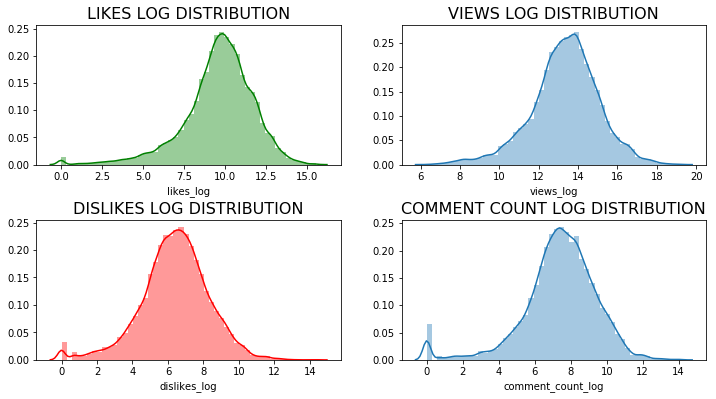

In [10]:
df_you['likes_log'] = np.log(df_you['likes']+1)
df_you['views_log'] = np.log(df_you['views'] +1)
df_you['dislikes_log'] = np.log(df_you['dislikes'] +1)
df_you['comment_count_log'] = np.log(df_you['comment_count']+1)

plt.figure(figsize = (12,6))
plt.subplot(221)
g1 = sns.distplot(df_you['likes_log'], color = 'green')
g1.set_title("LIKES LOG DISTRIBUTION", fontsize = 16)

plt.subplot(222)
g2 = sns.distplot(df_you['views_log'])
g2.set_title("VIEWS LOG DISTRIBUTION", fontsize = 16)

plt.subplot(223)
g3 = sns.distplot(df_you['dislikes_log'], color = 'r')
g3.set_title("DISLIKES LOG DISTRIBUTION", fontsize=16)

plt.subplot(224)
g4 = sns.distplot(df_you['comment_count_log'])
g4.set_title("COMMENT COUNT LOG DISTRIBUTION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)

plt.show()


In [ ]:
# Let us find out the unique category ids present in our dataset to assign appropriate category names in our dataframe

In [11]:
np.unique(df_you["category_id"])


array([ 1,  2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43],
      dtype=int64)

We see there are 16 unique categories. Let us now assign their names to corresponding category id.

In [13]:
df_you['category_name'] = np.nan

df_you.loc[(df_you["category_id"]== 1),"category_name"] = 'Film and Animation'
df_you.loc[(df_you["category_id"] == 2), "category_name"] = 'Cars and Vehicles'
df_you.loc[(df_you["category_id"] == 10), "category_name"] = 'Music'
df_you.loc[(df_you["category_id"] == 15), "category_name"] = 'Pet and Animals'
df_you.loc[(df_you["category_id"] == 17), "category_name"] = 'Sports'
df_you.loc[(df_you["category_id"] == 19), "category_name"] = 'Travel and Events'
df_you.loc[(df_you["category_id"] == 20), "category_name"] = 'Gaming'
df_you.loc[(df_you["category_id"] == 22), "category_name"] = 'People and Blogs'
df_you.loc[(df_you["category_id"] == 23), "category_name"] = 'Comedy'
df_you.loc[(df_you["category_id"] == 24), "category_name"] = 'Entertainment'
df_you.loc[(df_you["category_id"] == 25), "category_name"] = 'News and Politics'
df_you.loc[(df_you["category_id"] == 26), "category_name"] = 'How to and Style'
df_you.loc[(df_you["category_id"] == 27), "category_name"] = 'Education'
df_you.loc[(df_you["category_id"] == 28), "category_name"] = 'Science and Technology'
df_you.loc[(df_you["category_id"] == 29), "category_name"] = 'Non-profits and Activism'
df_you.loc[(df_you["category_id"] == 43), "category_name"] = 'Shows'


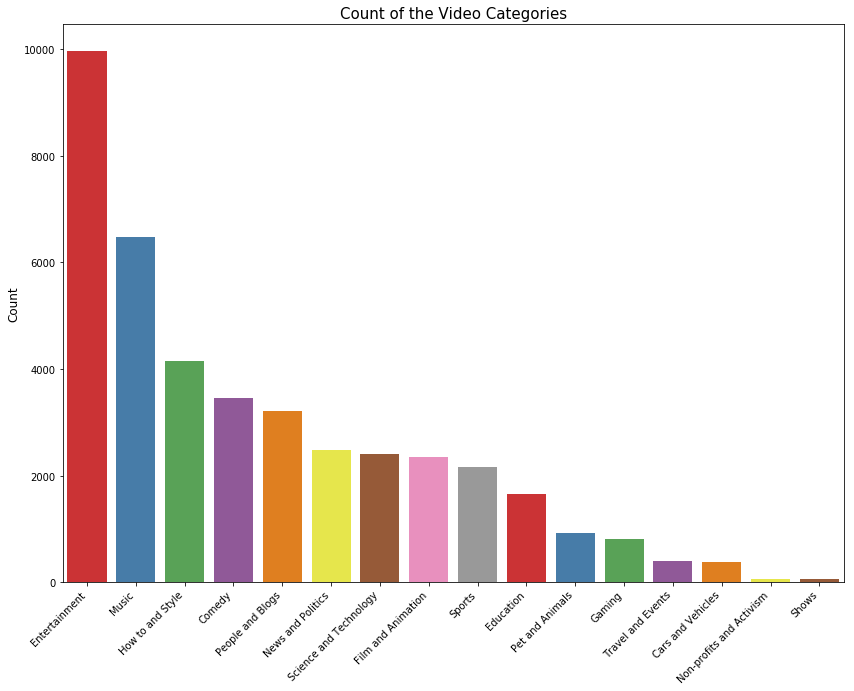

In [14]:
#Plotting the categories to see which ones are the popular ones 
plt.figure(figsize = (14,10))
g = sns.countplot('category_name', data = df_you, palette="Set1", order = df_you['category_name'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Count of the Video Categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()


We see from the above graph that the top viewed categories are 'Entertainment', 'Music', 'How to and Style', 'Comedy' and 'People and Blogs'

In [15]:
#Showing the top 5 categories
print("Category Name count")
print(df_you['category_name'].value_counts()[:5])

Category Name count
Entertainment       9964
Music               6472
How to and Style    4146
Comedy              3457
People and Blogs    3210
Name: category_name, dtype: int64


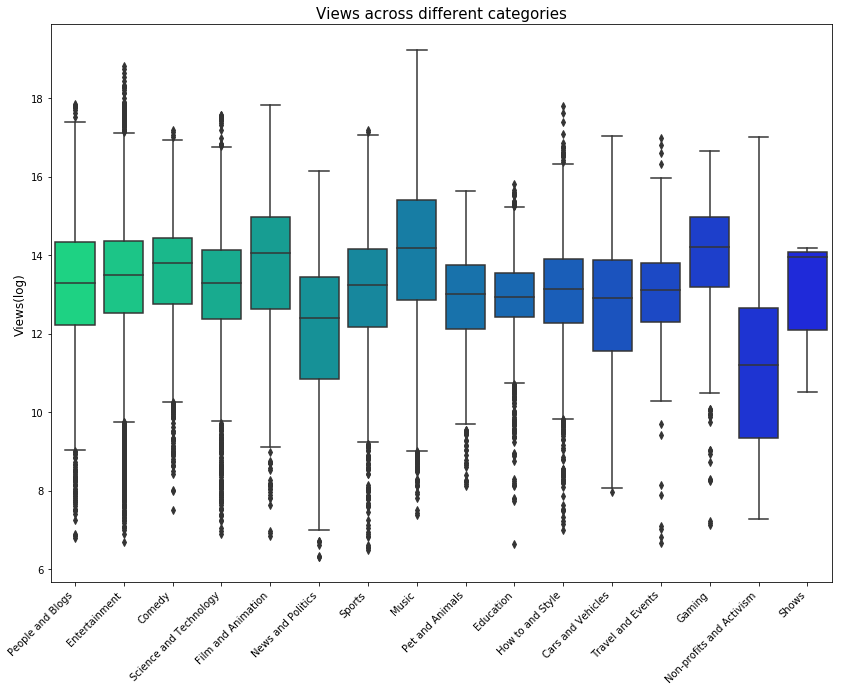

In [16]:
plt.figure(figsize = (14,10))
g = sns.boxplot(x = 'category_name', y = 'views_log', data = df_you, palette="winter_r")
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Views across different categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Views(log)", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

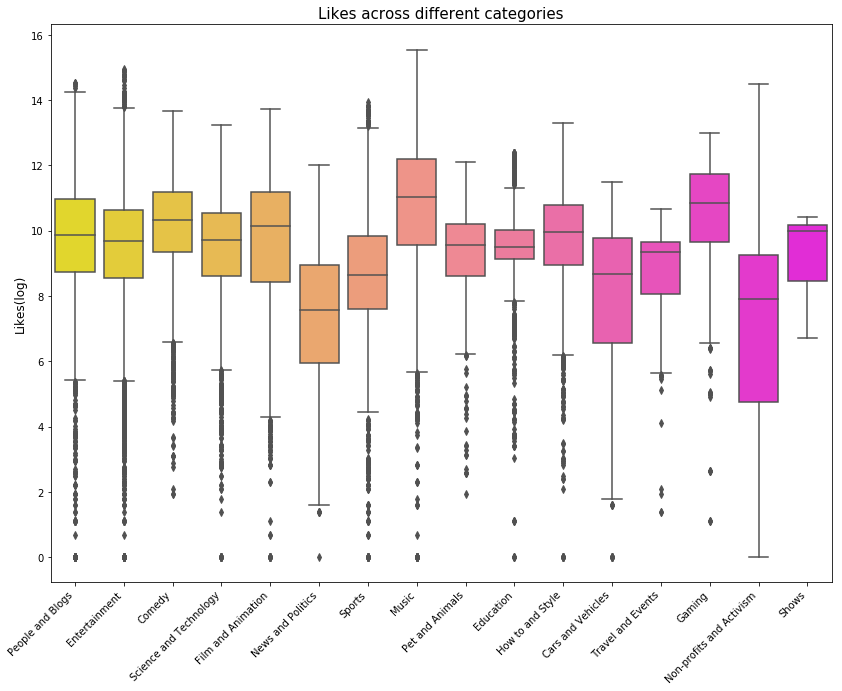

In [17]:
plt.figure(figsize = (14,10))
g = sns.boxplot(x = 'category_name', y = 'likes_log', data = df_you, palette="spring_r")
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Likes across different categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

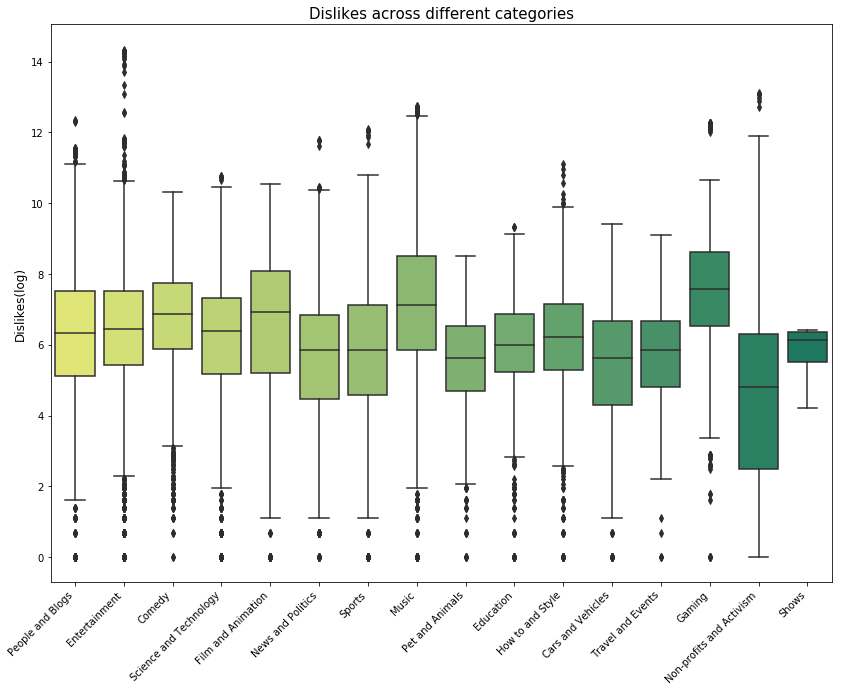

In [18]:
plt.figure(figsize = (14,10))
g = sns.boxplot(x = 'category_name', y = 'dislikes_log', data = df_you, palette="summer_r")
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Dislikes across different categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

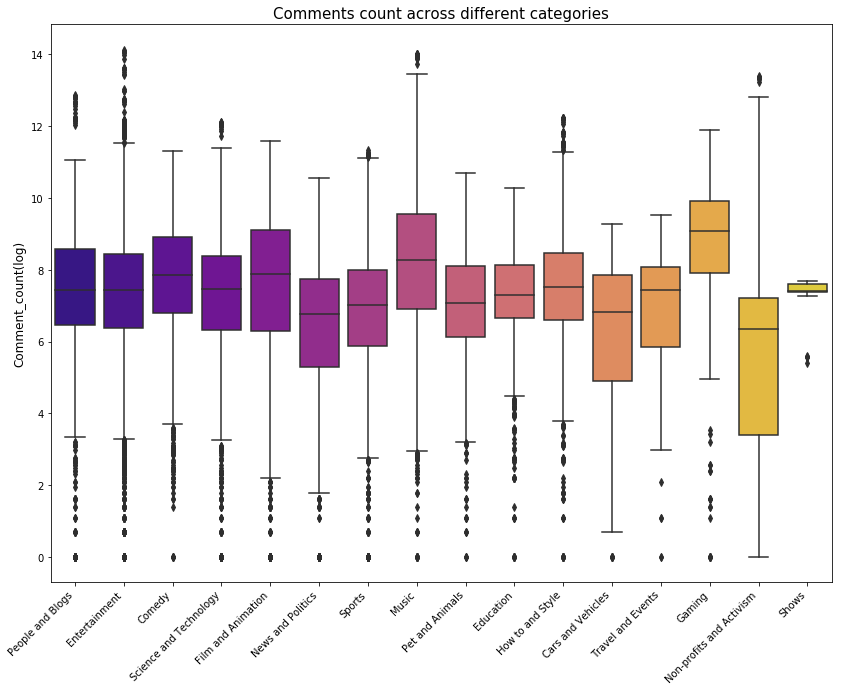

In [19]:
plt.figure(figsize = (14,10))
g = sns.boxplot(x = 'category_name', y = 'comment_count_log', data = df_you, palette="plasma")
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Comments count across different categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comment_count(log)", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

In [20]:
#Calculating the engagement measures - like rate, dislike rate and comment rate 
df_you['like_rate'] = df_you['likes']/df_you['views']
df_you['dislike_rate'] = df_you['dislikes']/df_you['views']
df_you['comment_rate'] = df_you['comment_count']/df_you['views']



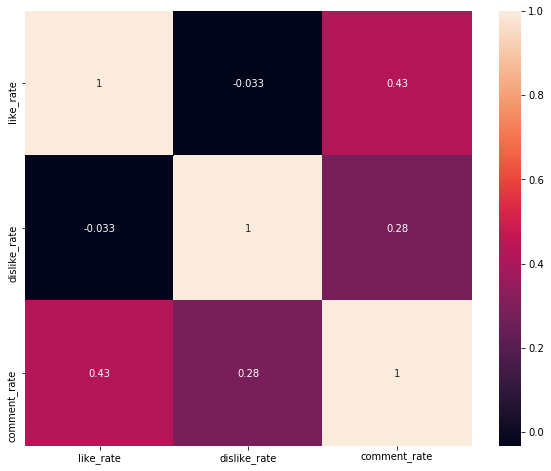

In [21]:
#Building a correlation matrix using a heatmap for engagement measures
plt.figure(figsize = (10,8))
sns.heatmap(df_you[['like_rate', 'dislike_rate', 'comment_rate']].corr(), annot=True)
plt.show()

From the above heatmap, it can be seen that if a viewer likes a particular video, there is a 43% chance that he/she will comment on it as opposed to 28% chance of commenting if the viewer dislikes the video. This is a good insight which means if viewers like any videos, they are more likely to comment on them to show their appreciation/feedback.

Next, I try to analyse the **word count** , **unique word count, punctuation count and average length of the words in the 'Title' and 'Tags' columns **

In [22]:
#Word count 
df_you['count_word']=df_you['title'].apply(lambda x: len(str(x).split()))
df_you['count_word_tags']=df_you['tags'].apply(lambda x: len(str(x).split()))

#Unique word count
df_you['count_unique_word'] = df_you['title'].apply(lambda x: len(set(str(x).split())))
df_you['count_unique_word_tags'] = df_you['tags'].apply(lambda x: len(set(str(x).split())))

#Punctutation count
df_you['count_punctuation'] = df_you['title'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_you['count_punctuation_tags'] = df_you['tags'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#Average length of the words
df_you['mean_word_len'] = df_you['title'].apply(lambda x : np.mean([len(x) for x in str(x).split()]))
df_you['mean_word_len_tags'] = df_you['tags'].apply(lambda x: np.mean([len(x) for x in str(x).split()]))

In [23]:
#Deriving unique word count percent in each comment
df_you['word_unique_percent'] = df_you['count_unique_word']*100/df_you['count_word']
df_you['word_unique_percent_tags'] = df_you['count_unique_word_tags']*100/df_you['count_word_tags']

#Deriving the punctuation rate in each comment
df_you['punct_percent'] = df_you['count_punctuation']*100/df_you['count_word']
df_you['punct_percent_tags'] = df_you['count_punctuation_tags']*100/df_you['count_word_tags']


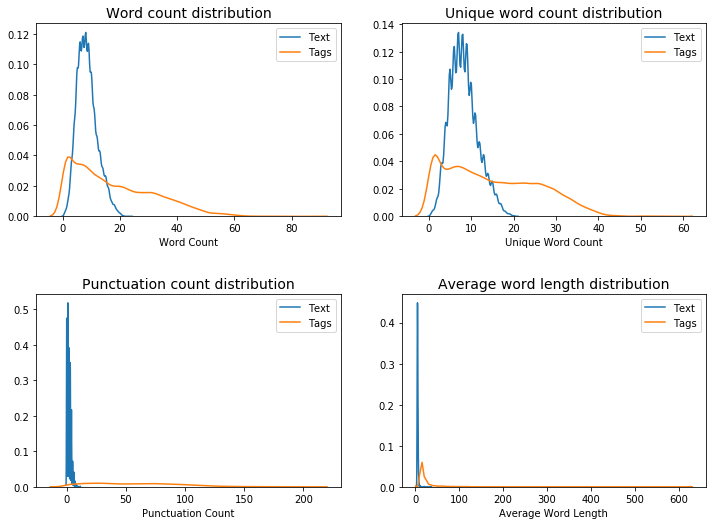

In [24]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(df_you['count_word'],
                 hist = False, label = 'Text')
g1 = sns.distplot(df_you['count_word_tags'],
                 hist = False, label = 'Tags')
g1.set_title('Word count distribution', fontsize = 14)
g1.set(xlabel='Word Count')

plt.subplot(422)
g2 = sns.distplot(df_you['count_unique_word'],
                 hist = False, label = 'Text')
g2 = sns.distplot(df_you['count_unique_word_tags'],
                 hist = False, label = 'Tags')
g2.set_title('Unique word count distribution', fontsize = 14)
g2.set(xlabel='Unique Word Count')

plt.subplot(423)
g3 = sns.distplot(df_you['count_punctuation'],
                 hist = False, label = 'Text')
g3 = sns.distplot(df_you['count_punctuation_tags'],
                 hist = False, label = 'Tags')
g3.set_title('Punctuation count distribution', fontsize =14)
g3.set(xlabel='Punctuation Count')

plt.subplot(424)
g4 = sns.distplot(df_you['mean_word_len'],
                 hist = False, label = 'Text')
g4 = sns.distplot(df_you['mean_word_len_tags'],
                 hist = False, label = 'Tags')
g4.set_title('Average word length distribution', fontsize = 14)
g4.set(xlabel = 'Average Word Length')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)
plt.legend()
plt.show()

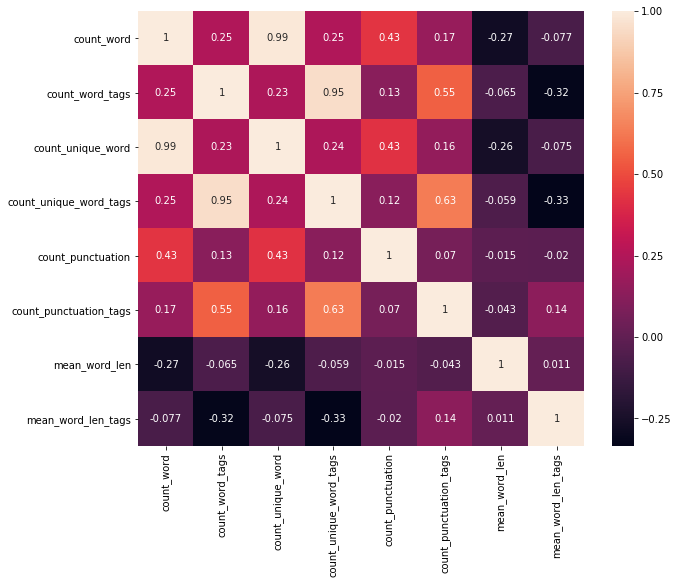

In [25]:
# Creating a heatmap to explore correlation between word count, unique word count, punctuation count and average word length

plt.figure(figsize = (10,8))
sns.heatmap(df_you[['count_word','count_word_tags','count_unique_word','count_unique_word_tags','count_punctuation','count_punctuation_tags','mean_word_len','mean_word_len_tags']].corr(), annot = True)
plt.show()


Let us now visualize the word cloud for Title of the videos, Description of the videos and videos Tags. This way we can discover which words are popular in the title, description and tags. Creating a word cloud is a popular way to find out trending words on the blogsphere.

 **1.** **Word Cloud for Title of the videos**

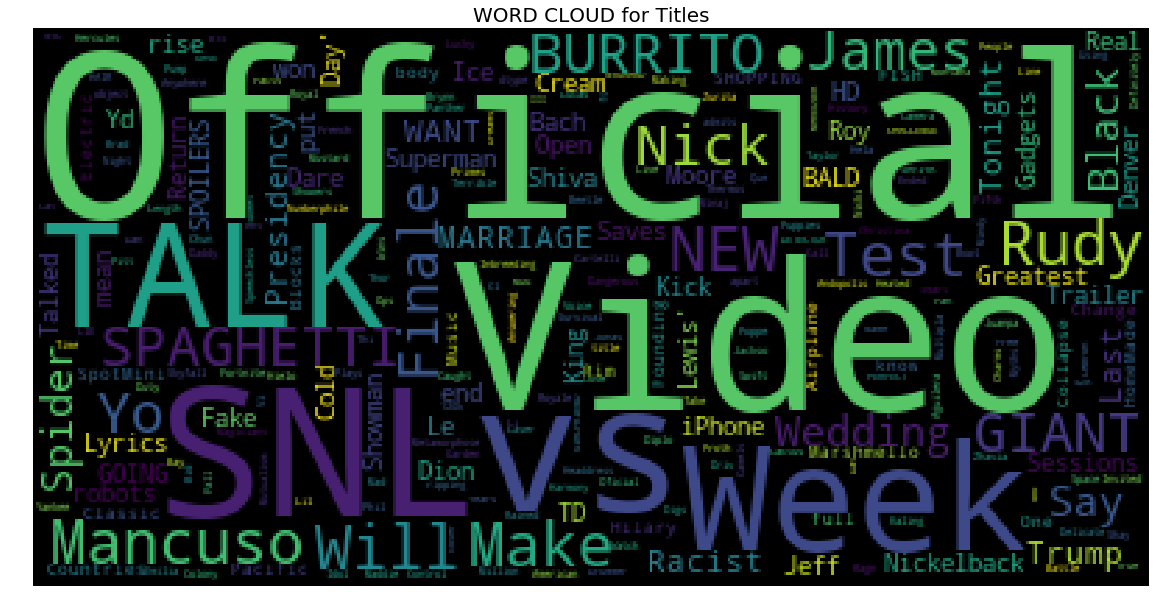

In [27]:
plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                      background_color = 'black',
                      stopwords=stopwords,
                      max_words = 1000,
                      max_font_size = 120,
                      random_state = 42
                    ).generate(str(df_you['title']))

#Plotting the word cloud
plt.imshow(wordcloud)
plt.title("WORD CLOUD for Titles", fontsize = 20)
plt.axis('off')
plt.show()

From the above word cloud, it is apparent that most popularly used title words are 'Official', 'Video', 'Talk', 'SNL', 'VS', and 'Week' among others.

**2. Word cloud for Title Description**

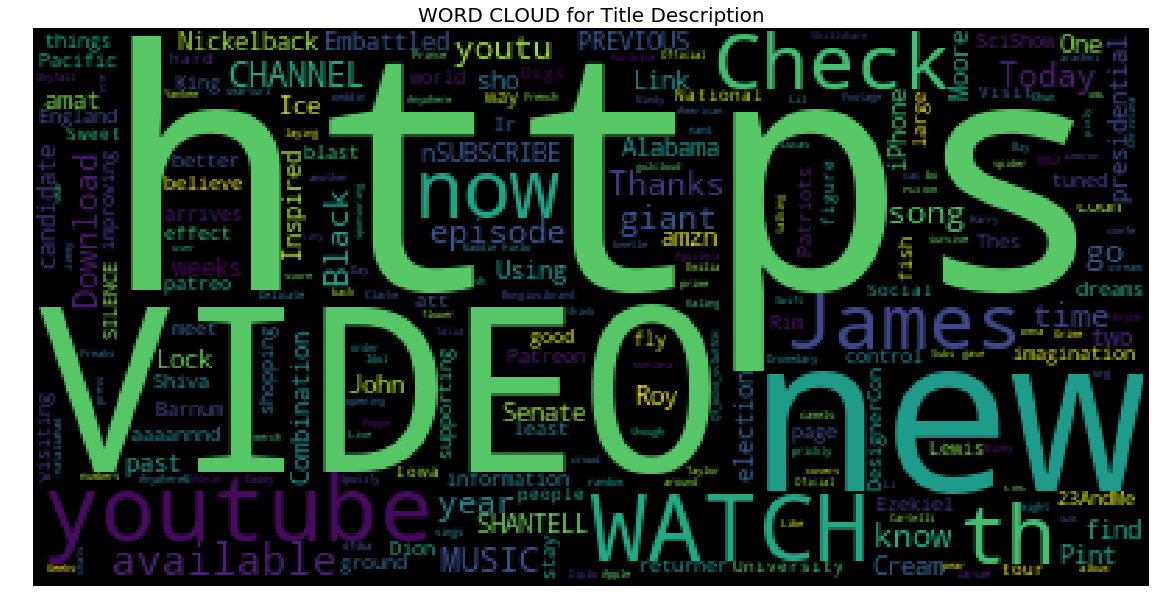

In [28]:
plt.figure(figsize = (20,20))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                      background_color = 'black',
                      stopwords = stopwords,
                      max_words = 1000,
                      max_font_size = 120,
                      random_state = 42
                    ).generate(str(df_you['description']))

plt.imshow(wordcloud)
plt.title('WORD CLOUD for Title Description', fontsize = 20)
plt.axis('off')
plt.show()

I found that the most popular words for description of videos are 'https', 'video', 'new', 'watch' among others.

**3. Word Cloud for Tags**

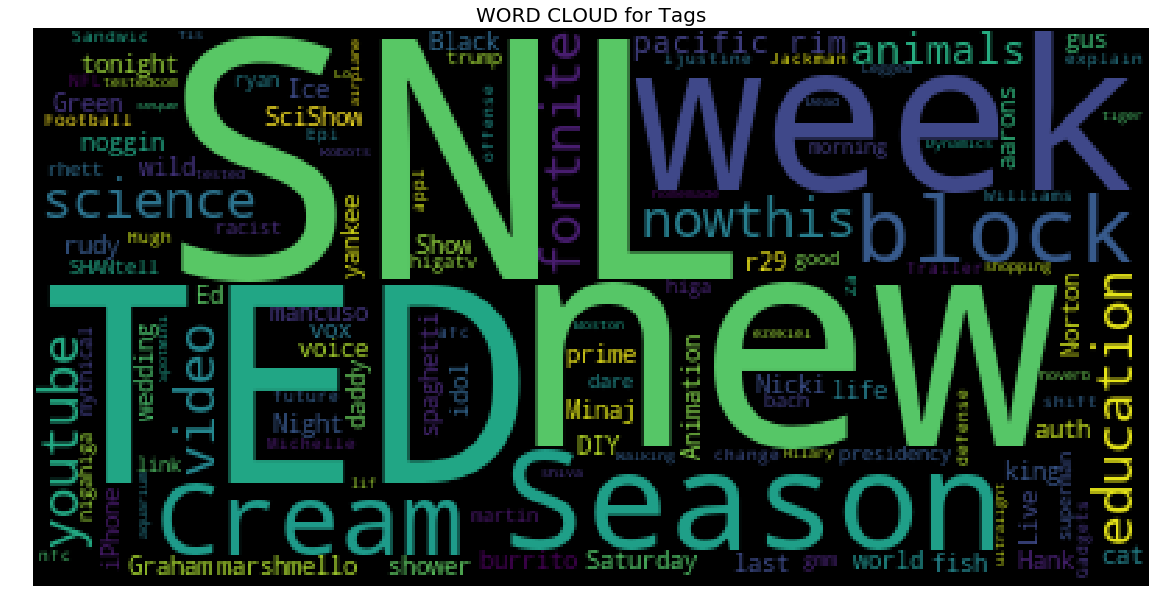

In [29]:
plt.figure(figsize = (20,20))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                      background_color = 'black',
                      stopwords = stopwords,
                      max_words = 1000,
                      max_font_size = 120,
                      random_state = 42
                    ).generate(str(df_you['tags']))

plt.imshow(wordcloud)
plt.title('WORD CLOUD for Tags', fontsize = 20)
plt.axis('off')
plt.show()

Popular tags seem to be 'SNL', 'TED', 'new', 'Season', 'week', 'Cream', 'youtube'
From the word cloud analysis, it looks like there are a lot of Saturday Night Live fans on the youtube out there!

_